In [532]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [533]:
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean.csv")
dataframe

,CLASS,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,Who,Where,When,What,Why,How,Additional information
0,entailment,28.645093,1.631951,9.032564,0.000000,6.144412,0.127508,0.000000,0.00000,4.677207,...,0,0,0,0.696783,0.076060,1.0,0.505262,1.0,1.0,1.000000
1,entailment,26.671300,3.984223,4.437697,0.000000,2.492923,8.615627,0.000000,0.00000,9.887845,...,0,0,0,0.762582,1.000000,1.0,0.944161,1.0,1.0,0.699488
2,contradiction,14.880619,1.824592,3.687874,0.000000,5.383794,1.300978,3.665578,0.00000,1.199861,...,0,0,0,0.881357,0.265408,1.0,0.360803,1.0,1.0,1.000000
3,contradiction,7.112267,0.000000,4.998954,0.000000,3.913144,0.000000,0.000000,0.00000,4.153236,...,0,0,0,0.153366,1.000000,1.0,0.358316,1.0,1.0,1.000000
4,neutral,14.623623,0.000000,1.083491,0.000000,1.657801,0.000000,0.000000,0.00000,3.077783,...,0,1,0,0.919903,0.715984,1.0,0.224679,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,entailment,22.531673,4.194771,1.396518,1.896350,0.000000,5.424360,1.283683,0.00000,3.104924,...,0,0,0,0.706643,0.210286,1.0,0.570392,1.0,1.0,1.000000
96,entailment,11.299096,0.000000,0.397504,0.000000,5.716955,0.000000,0.512868,0.00000,0.000000,...,0,0,0,0.894956,1.000000,1.0,0.830284,1.0,1.0,1.000000
97,contradiction,6.672148,0.000000,5.138863,0.000000,0.000000,0.000000,0.000000,0.00000,3.334945,...,0,0,0,0.072305,1.000000,1.0,0.086890,1.0,1.0,1.000000
98,contradiction,7.110450,0.000000,0.658881,0.000000,0.000000,0.000000,0.000000,0.00000,2.450452,...,0,0,0,0.655674,1.000000,1.0,0.357685,1.0,1.0,1.000000


In [534]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,Who,Where,When,What,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.000084,1.966909,3.329762,0.714661,4.027800,1.670292,0.708723,0.286763,3.231024,0.323173,...,0.160000,0.270000,0.090000,0.712144,0.751508,0.923311,0.496864,0.908617,0.860216,0.870180
std,13.066107,3.663051,3.705304,1.865683,5.916808,3.708663,1.476073,1.224743,3.755477,0.811359,...,0.677488,1.052702,0.668105,0.254961,0.338036,0.233606,0.327958,0.259196,0.309860,0.293922
min,0.916115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072305,0.076060,0.187566,-0.011613,-0.009505,0.026425,-0.013459
25%,9.314418,0.000000,0.325808,0.000000,0.000000,0.000000,0.000000,0.000000,1.096962,0.000000,...,0.000000,0.000000,0.000000,0.532159,0.360418,1.000000,0.216580,1.000000,1.000000,1.000000
50%,14.530209,0.000000,2.048562,0.000000,2.046613,0.000000,0.000000,0.000000,2.370600,0.000000,...,0.000000,0.000000,0.000000,0.751170,1.000000,1.000000,0.456016,1.000000,1.000000,1.000000
75%,22.358584,2.639672,5.007361,0.000000,5.493229,0.862745,0.984578,0.000000,3.736365,0.000000,...,0.000000,0.000000,0.000000,0.986195,1.000000,1.000000,0.807519,1.000000,1.000000,1.000000
max,72.258190,19.695068,19.075915,8.491863,35.697347,20.094136,8.336549,9.572460,20.975957,5.915599,...,5.000000,9.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [535]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


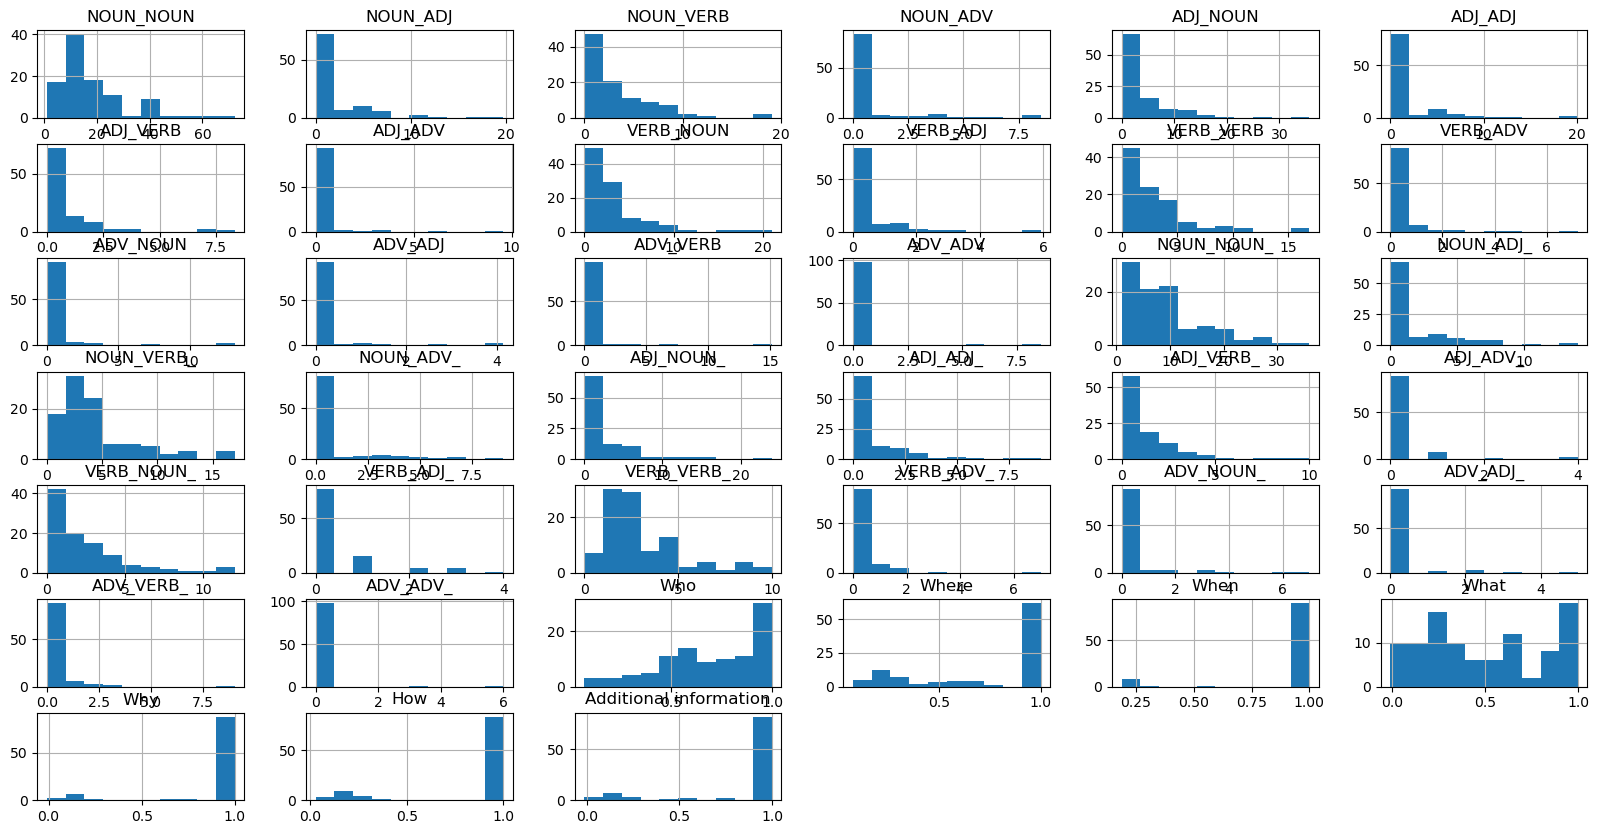

In [536]:
dataframe.hist(figsize=(20,10))
plt.show()

In [537]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [538]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [539]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_18656\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_18656\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 39)

In [540]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [541]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [542]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [543]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [544]:
model.decision_function(X)

array([[-0.12339624,  0.4178118 , -0.29441556],
       [-1.00617813,  0.99993969,  0.00623844],
       [-0.03815212,  0.51939671, -0.48124459],
       [ 0.23118516,  0.17713346, -0.40831862],
       [-0.10919221, -0.03990528,  0.14909748],
       [ 0.45262614, -0.43792688, -0.01469926],
       [-0.1197257 ,  0.38964506, -0.26991937],
       [-0.34433994,  1.18518823, -0.84084829],
       [ 0.32470708, -0.40249825,  0.07779117],
       [-0.24800744,  1.20088679, -0.95287934],
       [-2.15374826,  0.50175569,  1.65199258],
       [-0.21830966,  0.5460309 , -0.32772124],
       [-1.03748447,  1.07834154, -0.04085707],
       [ 1.39471272,  0.38359134, -1.77830406],
       [-1.48577335,  0.03340116,  1.45237218],
       [-0.0543238 ,  0.30784067, -0.25351687],
       [-2.57963876,  2.50102521,  0.07861355],
       [ 0.33667654, -0.048213  , -0.28846354],
       [-0.45047648,  0.34771197,  0.10276451],
       [ 0.6474052 ,  0.78673436, -1.43413956],
       [-0.12033546,  0.8181525 , -0.697

In [549]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV',
 'NOUN_NOUN_',
 'NOUN_ADJ_',
 'NOUN_VERB_',
 'NOUN_ADV_',
 'ADJ_NOUN_',
 'ADJ_ADJ_',
 'ADJ_VERB_',
 'ADJ_ADV_',
 'VERB_NOUN_',
 'VERB_ADJ_',
 'VERB_VERB_',
 'VERB_ADV_',
 'ADV_NOUN_',
 'ADV_ADJ_',
 'ADV_VERB_',
 'ADV_ADV_',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'H1']

In [550]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [551]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [552]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  24 VERB_NOUN_ 32 W1
Entailment  35 W4 21 ADJ_ADJ_
Neutral  30 ADV_VERB_ 35 W4


In [553]:
n_columns=dataframe.shape[1]-1

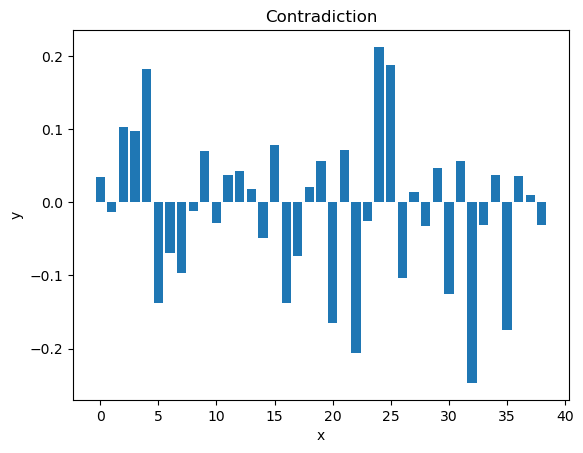

In [554]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

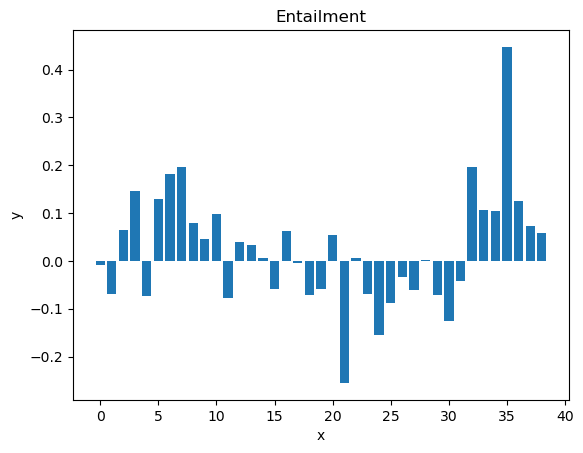

In [555]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

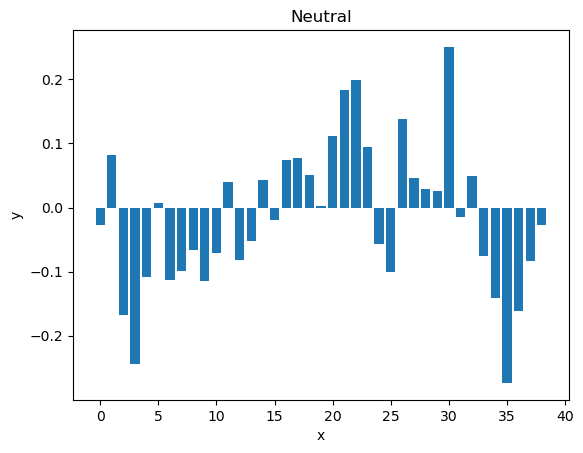

In [556]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [557]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'contradiction' 'neutral'
 'contradiction' 'entailment' 'entailment' 'contradiction' 'entailment'
 'neutral' 'entailment' 'entailment' 'contradiction' 'neutral'
 'entailment' 'entailment' 'contradiction' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'contradiction' 'entailment'
 'neutral' 'entailment' 'contradiction' 'entailment' 'neutral'
 'entailment' 'contradiction' 'entailment' 'entailment' 'contradiction'
 'neutral' 'entailment' 'contradiction' 'neutral' 'neutral' 'neutral'
 'neutral' 'contradiction' 'neutral' 'entailment' 'entailment' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'contradiction' 'neutral' 'neutral'
 'entailment' 'neutral' 'contradiction' 'contradiction' 'neutral'
 'neutral' 'entailment' 'entailment' 'ent

In [558]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [559]:
X

array([[28.64509261,  1.63195105,  9.03256369, ...,  1.        ,
         1.        ,  1.        ],
       [26.67130001,  3.98422295,  4.43769664, ...,  1.        ,
         1.        ,  0.6994884 ],
       [14.88061917,  1.82459164,  3.68787432, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 6.67214802,  0.        ,  5.13886273, ...,  1.        ,
         1.        ,  1.        ],
       [ 7.11044979,  0.        ,  0.6588807 , ...,  1.        ,
         1.        ,  1.        ],
       [13.31903434,  0.        ,  0.19219354, ...,  1.        ,
         1.        ,  1.        ]])

In [560]:
model.score(X,y)

0.7

In [561]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [562]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: 0.437500 (0.334244)


c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [563]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.75


In [564]:
print(confusion_matrix(Y_validation, predictions))

[[3 2 2]
 [0 6 0]
 [0 1 6]]


In [565]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       1.00      0.43      0.60         7
   entailment       0.67      1.00      0.80         6
      neutral       0.75      0.86      0.80         7

     accuracy                           0.75        20
    macro avg       0.81      0.76      0.73        20
 weighted avg       0.81      0.75      0.73        20



In [566]:
#X_new = pd.DataFrame()
#model.predict(X_new)